In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

In [232]:
# read in the data. join_date & quit_date should be dates, so convert them into date objects for further use.
df = pd.read_csv("employee_retention.csv", parse_dates=['join_date', 'quit_date'])
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [233]:
#  take a look at the summary of the data set
print(df.info())
print(df.describe())
print(df.describe(include=['datetime64[ns]']))
print(df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB
None
         employee_id    company_id     seniority         salary
count   24702.000000  24702.000000  24702.000000   24702.000000
mean   501604.403530      3.426969     14.127803  138183.345478
std    288909.026101      2.700011      8.089520   76058.184573
min        36.000000      1.000000      1.000000   17000.000000
25%    250133.750000      1.000000      7.000

**Missing Values**
- there're 7 columns in total, and only quit_date has missing values. 
- However, according to the definition of the data, those who do not have missing values are the ones who stay with the company. Thus, based on this column, we can create our target variable: churn, where 1 stands for 'churn' and 0 stands for 'stay'. 

In [234]:
df['churn'] = np.where(df['quit_date'].isnull(), 1, 0)

**Abnormal Values**

- the max value in seniority column seems strange. zoom in.

In [235]:
df['seniority'].value_counts().sort_values(ascending=True)

98       1
99       1
28     585
29     626
27     642
26     694
25     715
24     743
22     764
21     782
23     785
20     844
1      861
18     872
3      881
17     893
13     894
4      895
19     910
15     911
14     920
11     924
10     927
7      928
5      936
16     936
2      942
9      944
6      950
12     988
8     1008
Name: seniority, dtype: int64

In [236]:
df[(df['seniority']==99)|(df['seniority']==98)]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,0
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06,0


In [237]:
# According to the definition of seniority, which is, YOE before joining the company, seniority of 99 or 98 is obviously impossible. 
# Thus, we decided to drop the rows
df = df[-((df['seniority']==99) | (df['seniority']==98))]

In [238]:
#  take a look at the summary of the data set
print(df.info())
print(df.describe())
print(df.describe(include=['datetime64[ns]']))
print(df.describe(include=['object']))

# Now the data makes more sense.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24700 non-null  float64       
 1   company_id   24700 non-null  int64         
 2   dept         24700 non-null  object        
 3   seniority    24700 non-null  int64         
 4   salary       24700 non-null  float64       
 5   join_date    24700 non-null  datetime64[ns]
 6   quit_date    13508 non-null  datetime64[ns]
 7   churn        24700 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.7+ MB
None
         employee_id    company_id     seniority         salary         churn
count   24700.000000  24700.000000  24700.000000   24700.000000  24700.000000
mean   501616.624899      3.426802     14.120972  138176.275304      0.453117
std    288908.533280      2.699752      8.054137   76056.331953      0.497807
min 

## Create Table for day, employee headcount, and company_id

In [239]:
# df = pd.read_csv('employee_retention.csv', parse_dates=['join_date','quit_date'])

unique_date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(df['company_id'].unique())

day = []
company = []
headcount = []

for date in unique_date:
    for idx in unique_company:
#         conditions connected by & should be rounded in () seperately
        total_join = len(df[(df['join_date'] <= date) & (df['company_id'] == idx)])
        total_quit = len(df[(df['quit_date'] <= date) & (df['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join - total_quit)
        
table = pd.DataFrame({"day": day, "company_id": company, "employee_headcount": headcount},
                    columns=['day', 'company_id', 'employee_headcount'])

In [240]:
table.head()

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


## EDA & Feature Engineering

**employee_id**

In [257]:
# Check the uniqueness of the employee_id
df['employee_id'].nunique() == len(df)

True

In [258]:
# It is unique and thus set it to index
df = df.set_index('employee_id')

**join date & quit date**

In [314]:
df['quit_month'] = df['quit_date'].apply(lambda x: x.month)
df['join_month'] = df['join_date'].apply(lambda x: x.month)

In [419]:
df['duration'] = (df['quit_date'].fillna(pd.Timestamp('20151213')) - df['join_date']).apply(lambda x: x.days)

In [325]:
df_stay = df[df['quit_date'].isnull()].copy()
df_quit = df[-df['quit_date'].isnull()].copy()

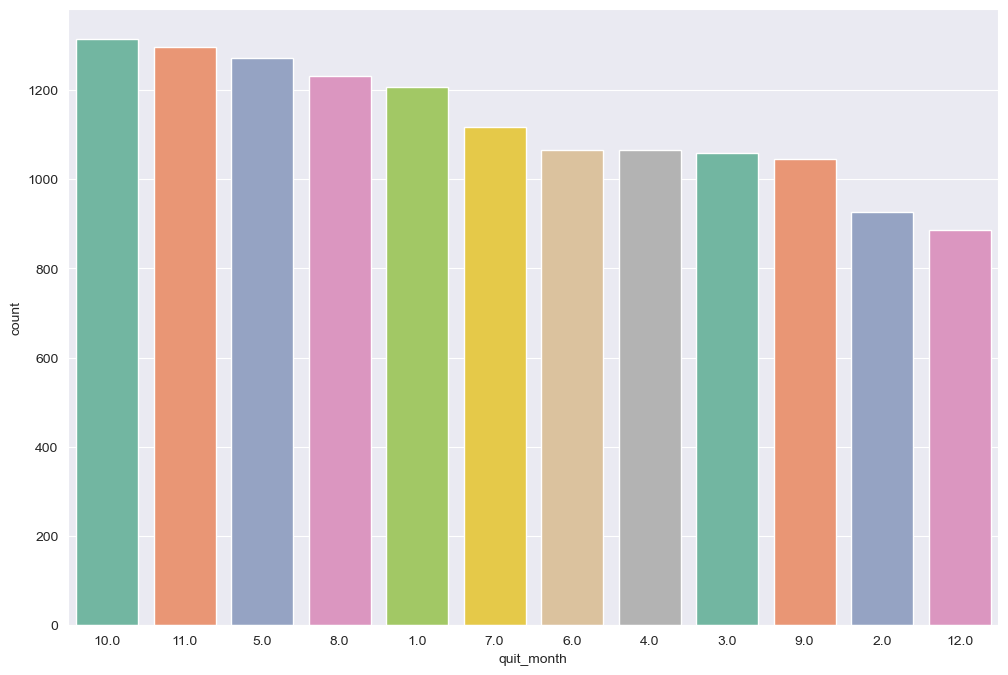

In [334]:
plt.figure(figsize=(12,8))

sns.countplot(df_quit['quit_month'], order = df_quit['quit_month'].value_counts().index, palette="Set2")

ax.set_xlabel('Quit Month')
ax.set_ylabel('Frequcency')
ax.set_title('Frequency of Quit Month')

plt.show()

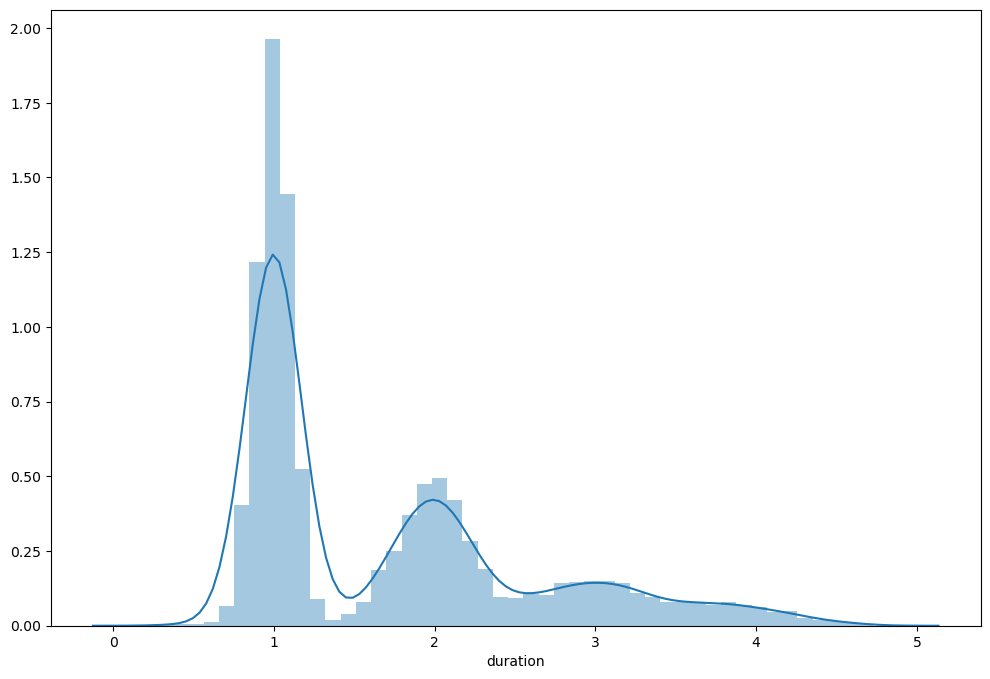

In [418]:
plt.figure(figsize=(12,8))

sns.distplot(df_quit['duration']/365)

plt.show()

In [354]:
# Understand Mean Salary/Seniority of Churn Employees for Each Month
quit_seniority = df_quit.groupby('quit_month')['seniority'].agg(['mean','std'])

,mean,std
quit_month,,
1.0,14.073798,7.907265
2.0,14.188985,7.882099
3.0,14.388102,7.905484
4.0,14.201878,7.891510
5.0,13.852987,8.028642
6.0,14.180282,8.232830
7.0,14.052820,8.063585
8.0,13.977273,7.726928
9.0,14.402486,7.898250


In [359]:
for column in ['seniority','salary','join_month']:
    print(column, df_quit['quit_month'].corr(df_quit[column]))

seniority -0.0030805998669161017
salary 0.006007257273447751
join_month 0.3971496236013474


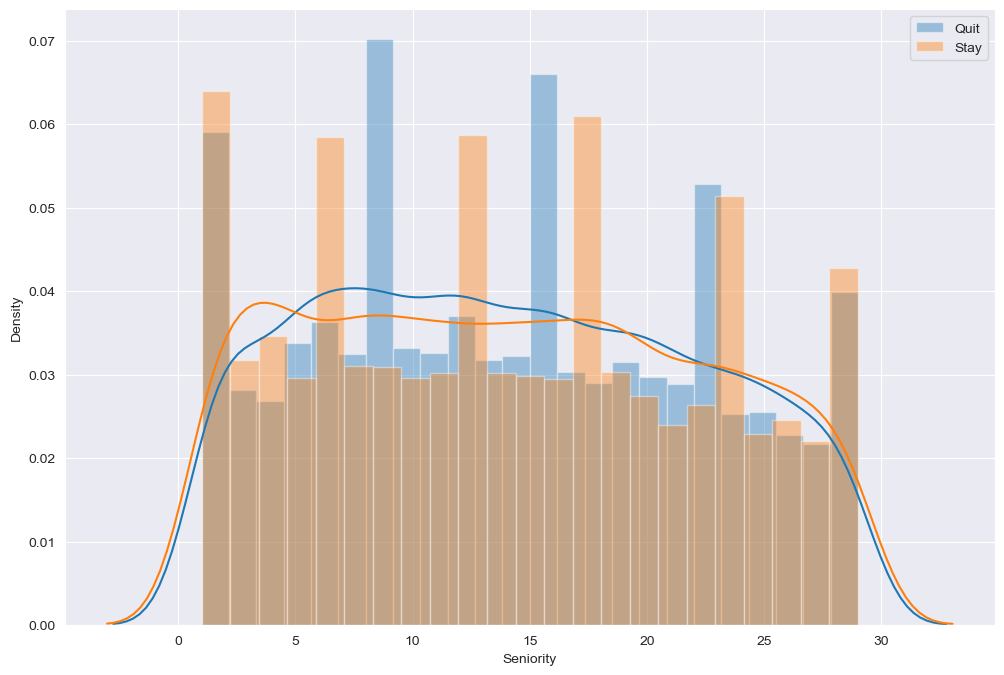

In [371]:
plt.figure(figsize=(12,8))

_ = sns.distplot(df_quit['seniority'], label = 'Quit')
_ = sns.distplot(df_stay['seniority'], label = 'Stay')

plt.xlabel("Seniority")
plt.ylabel("Density")

plt.legend()

plt.show()

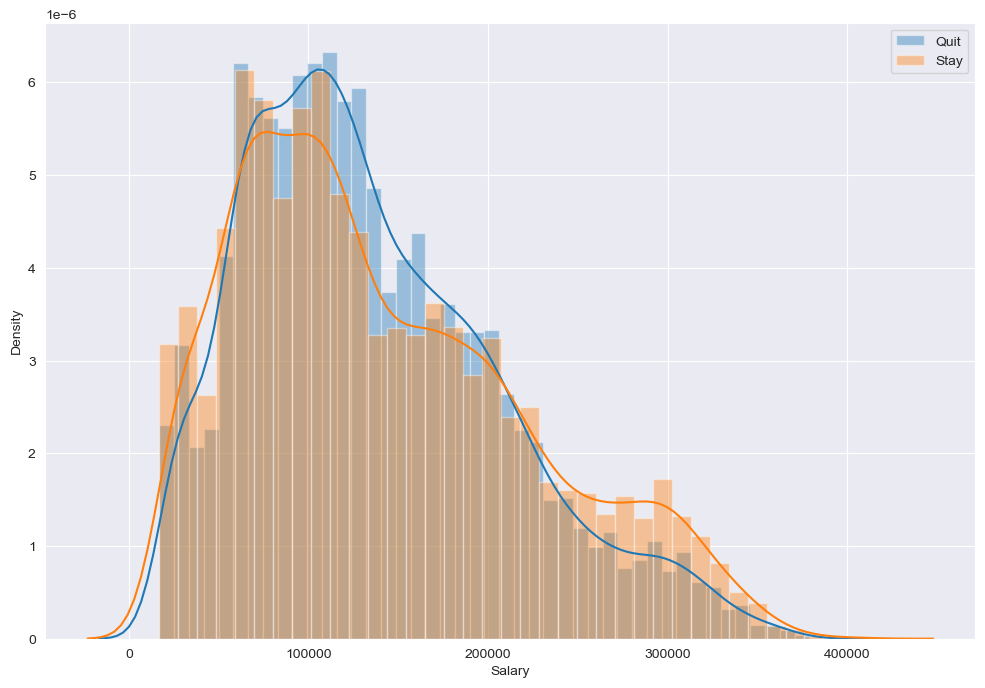

In [372]:
plt.figure(figsize=(12,8))

_ = sns.distplot(df_quit['salary'], label = 'Quit')
_ = sns.distplot(df_stay['salary'], label = 'Stay')

plt.xlabel("Salary")
plt.ylabel("Density")

plt.legend()

plt.show()

In [416]:
df_quit['duration'] = (df_quit['quit_date'] - df_quit['join_date']).apply(lambda x: x.days)

In [417]:
df_quit.head()

,company_id,dept,seniority,salary,join_date,quit_date,churn,quit_month,join_month,duration,yrs
employee_id,,,,,,,,,,,
13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0,10.0,3,585,1.602740
825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0,4.0,4,340,0.931507
662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0,6.0,5,389,1.065753
256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0,8.0,10,1040,2.849315
509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,0,8.0,1,578,1.583562


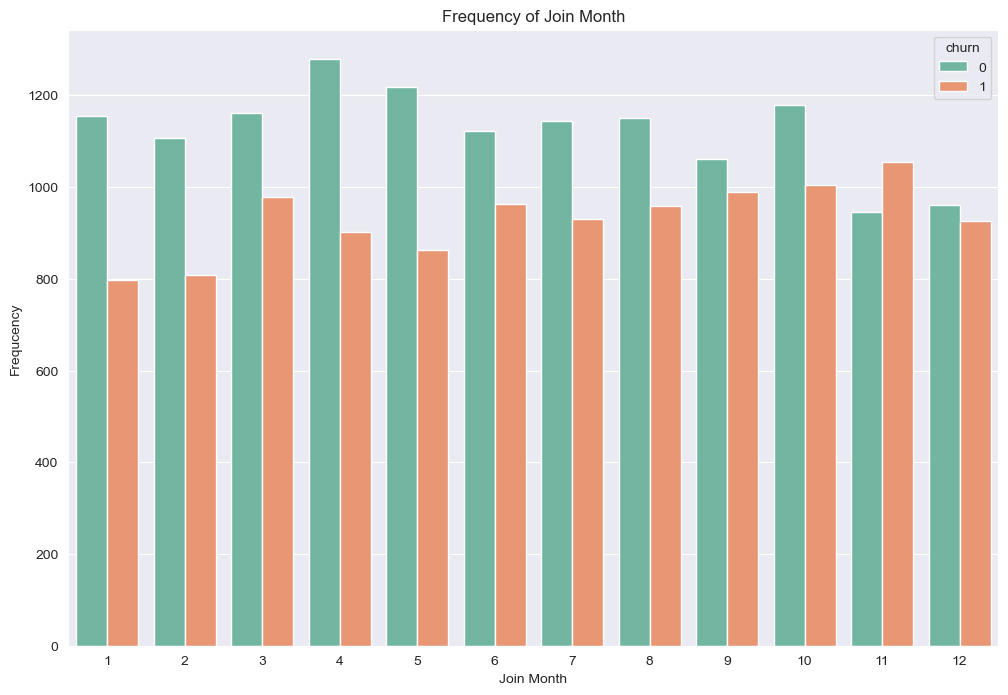

In [344]:
plt.figure(figsize=(12,8))

_ = sns.countplot(x='join_month', palette="Set2", data=df, hue='churn')

plt.xlabel('Join Month')
plt.ylabel('Frequcency')
plt.title('Frequency of Join Month')

plt.show()

In [330]:
df['join_month'].corr(df['quit_month'])

0.3971496236013474

**distribution overview**

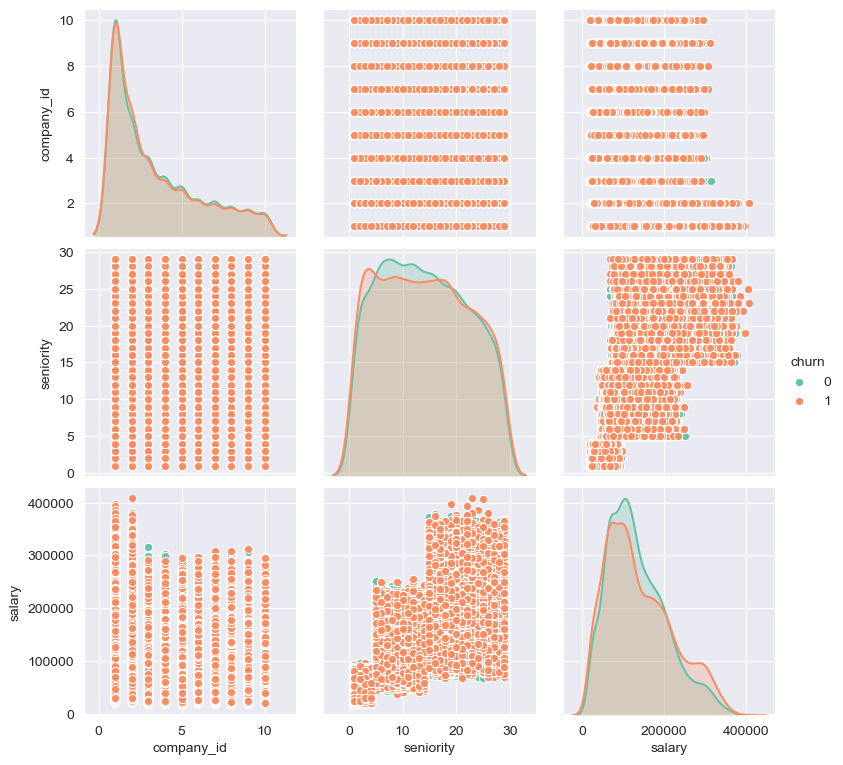

In [305]:
sns.pairplot(df, kind='scatter', hue='churn', palette="Set2")
plt.show()

**According to the plot, there's not much different among the variables. consider zooming in each column and conducting some feature engineerings.**

**company_id**

In [259]:
df['company_id'].value_counts(normalize=True)

1     0.343522
2     0.170931
3     0.111296
4     0.083482
5     0.071053
6     0.052267
7     0.049555
8     0.042389
9     0.038907
10    0.034980
12    0.000972
11    0.000648
Name: company_id, dtype: float64

In [260]:
# company_id = 11 or 12 are outliers, consider deleting

df = df[(df['company_id']!=12) & (df['company_id']!=11)]

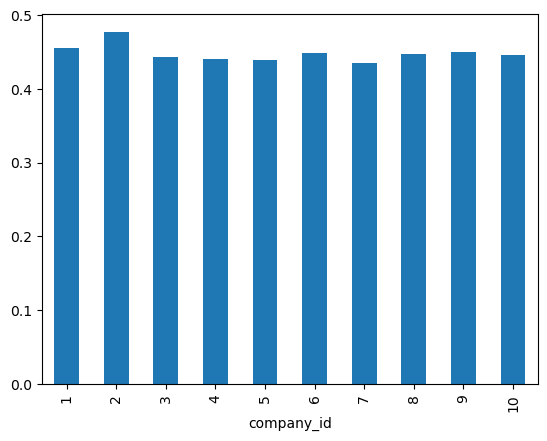

In [261]:
df.groupby('company_id').mean()['churn'].plot(kind='bar')

In [263]:
# See the correlation between company_id and other numeric variables
print("company_id & seniority:", df['company_id'].corr(df['seniority']))
print("company_id & salary:", df['company_id'].corr(df['salary']))

company_id & seniority: -0.009719464310558321
company_id & salary: -0.16208673082587638


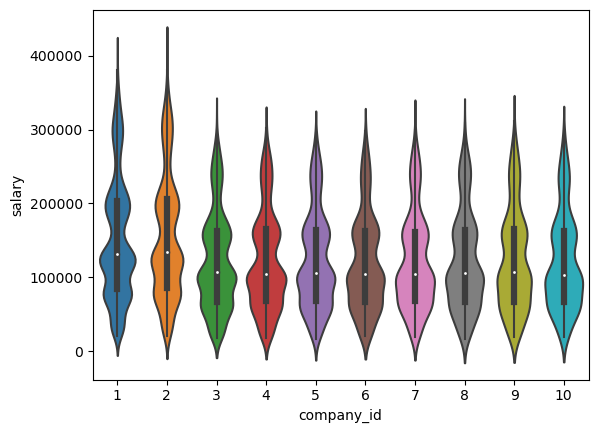

In [283]:
sns.violinplot(x='company_id', y='salary', data=df)
# plt.legend(df['company_id'].unique())
plt.show()

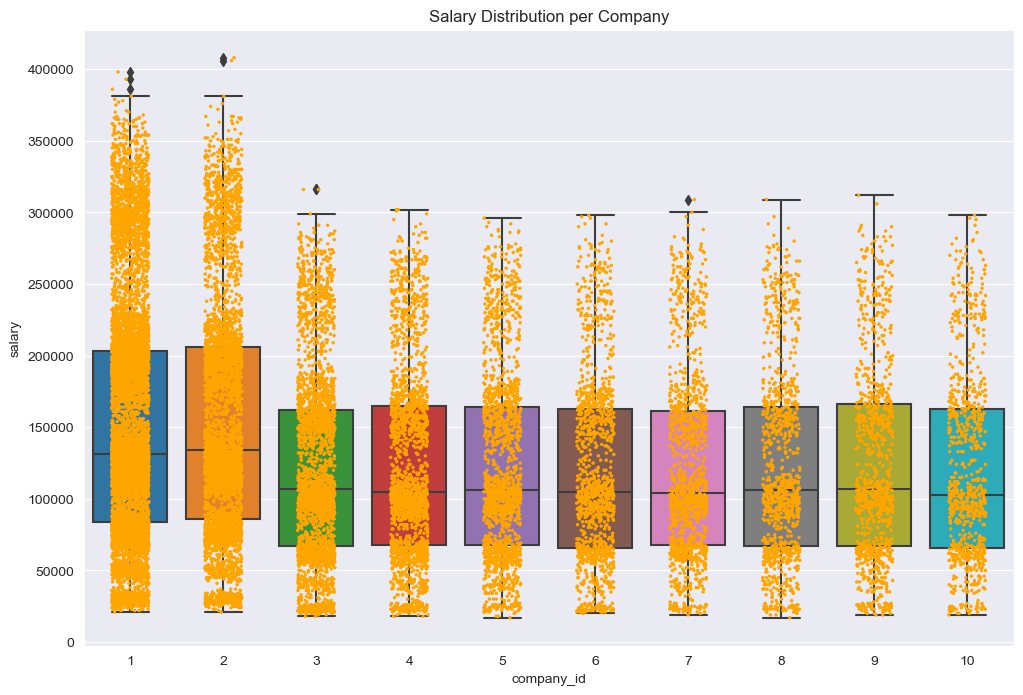

In [292]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,8))

ax = sns.boxplot(x='company_id', y='salary', data=df)
ax = sns.stripplot(x='company_id', y='salary', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Salary Distribution per Company")

plt.show()

**Salary**

It seems that for both who quit and stay, their salary are right skewed. In pther words, the distribution of salary looks similar. 
However, for quited employees, their salary is a bit more wide spreaded compared with those who stay.

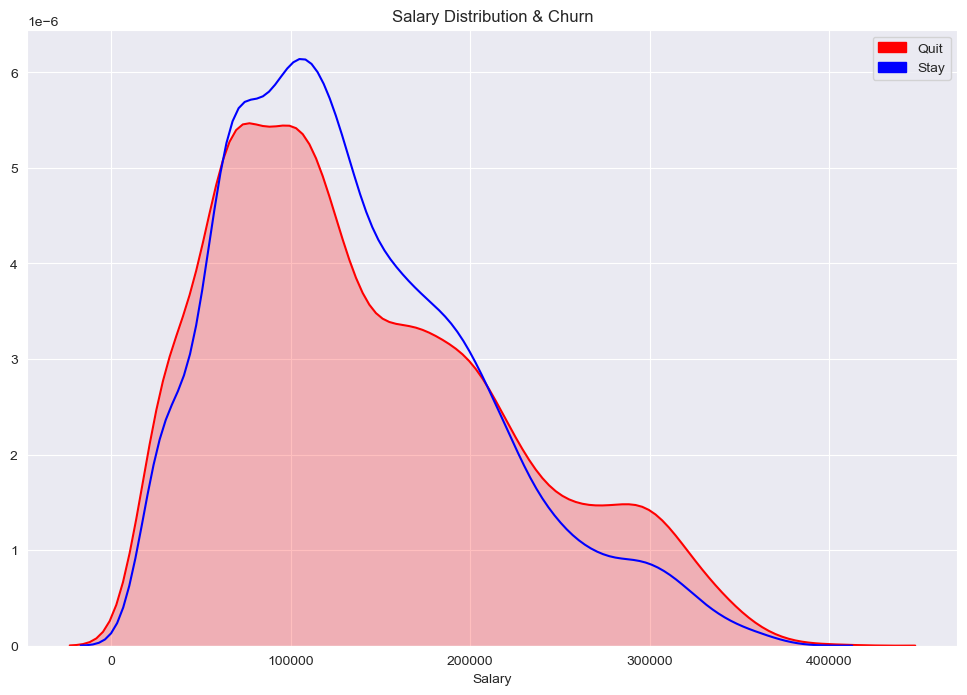

In [311]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12,8))

_ = sns.kdeplot(df[df['churn']==1]['salary'], shade=True, color="r")
_ = sns.kdeplot(df[df['churn']==0]['salary'], shade=False, color="b")

red_patch = mpatches.Patch(color='red', label='Quit')
blue_patch = mpatches.Patch(color='blue', label='Stay')
plt.legend(handles=[red_patch, blue_patch])

plt.xlabel("Salary")
plt.title("Salary Distribution & Churn")

plt.show()

In [312]:
# Other correlations
df['salary'].corr(df['seniority'])

0.5607431836344052

In [377]:
# Consider Create a New Feature: Salary/Seniority Ratio 

df['pay_ratio'] = df['salary']/df['seniority']

# plt.figure(figsize=(12,8))

# _ = sns.distplot(df[df['churn']==1]['pay_ratio'], label = 'Quit')
# _ = sns.distplot(df[df['churn']==0]['pay_ratio'], label = 'Stay')

# plt.xlabel("Salary")
# plt.ylabel("Density")

# plt.legend()

# plt.show()

In [380]:
df.drop(columns=['join_date','quit_date','quit_month']).corr()['churn']

company_id   -0.012842
seniority     0.000432
salary        0.036894
churn         1.000000
join_month    0.055228
pay_ratio     0.016907
Name: churn, dtype: float64

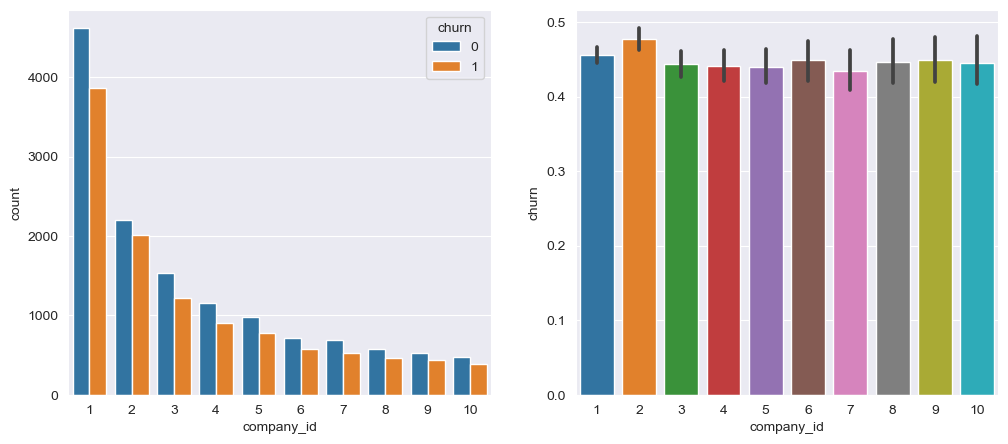

In [383]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,5))
sns.countplot(x = 'company_id', hue = 'churn', data = df, ax=ax[0])
sns.barplot(x = 'company_id', y='churn', data= df, ax=ax[1])

plt.show()

# H2ORandomForest

In [402]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 1 hour 46 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,7 months and 7 days !!!
H2O_cluster_name:,H2O_from_python_chuichuider_fc5muy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.603 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [420]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df.drop(columns=['quit_date','join_date','quit_month']), 
                               test_size=0.4,random_state=1234, stratify=df['churn'])

In [421]:
df_hex = h2o.H2OFrame(df)
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [422]:
train.columns

Index(['company_id', 'dept', 'seniority', 'salary', 'churn', 'join_month',
       'pay_ratio', 'duration'],
      dtype='object')

In [423]:
predictors = list(train.drop(columns=['churn']).columns)
target = 'churn'

In [424]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
RF_modl = H2ORandomForestEstimator(
        model_id = 'RF_modl',
        ntrees = 100,
        nfolds=5,
        min_rows=100,
        seed=1234, categorical_encoding='auto')
RF_modl.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [425]:
def VarImp(model_name,m_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (12,12))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title(m_name + ' Variable Importance')
    plt.show()

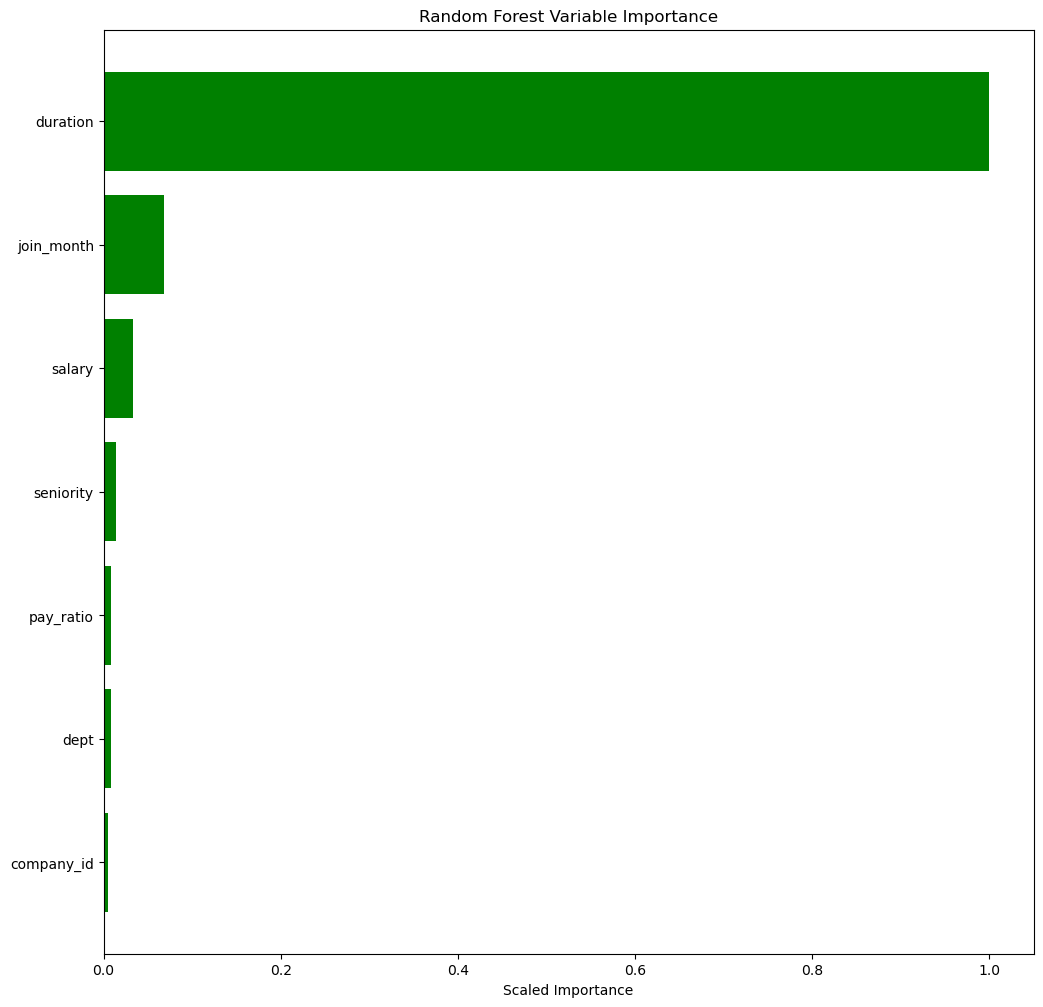

In [426]:
VarImp(RF_modl,'Random Forest')

In [427]:
def actual_predict(model,test_hex,target):
    y_pred = model.predict(test_hex).as_data_frame()
    y_actual = test_hex[target].as_data_frame()
    df_actual_predict = pd.concat([y_actual,y_pred],axis=1)
    df_actual_predict.columns = ['actual','pred']
    return(df_actual_predict)

In [428]:
RF_actual_predict = actual_predict(RF_modl,test_hex,target)
RF_actual_predict.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


,actual,pred
0,1,0.480712
1,0,0.111172
2,0,0.310018
3,1,0.894765
4,0,0.508553


In [429]:
from sklearn.metrics import roc_curve,roc_auc_score, auc 
from sklearn.metrics import average_precision_score, precision_recall_curve

dd = RF_actual_predict.copy()
RF_roc_auc_value = roc_auc_score(dd['actual'],dd['pred'])
RF_roc_auc_value

0.8731859660124474

In [430]:
def ROC_PR(df_actual_predict):
    
    # ROC
    from sklearn.metrics import roc_curve,roc_auc_score, auc 
    from sklearn.metrics import average_precision_score, precision_recall_curve

    roc_auc_value = roc_auc_score(df_actual_predict['actual'],df_actual_predict['pred'])
    fpr, tpr, _ = roc_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    roc_auc = auc(fpr,tpr)
    
    import matplotlib.pyplot as plt
    lw=2
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='AUC = %0.4f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: AUC={0:0.4f}'.format(roc_auc_value))
    plt.legend(loc='lower right')
    
    # Precision-Recall
    plt.subplot(1,2,2)
    average_precision = average_precision_score(df_actual_predict['actual'],df_actual_predict['pred'])
    precision, recall, _ = precision_recall_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))

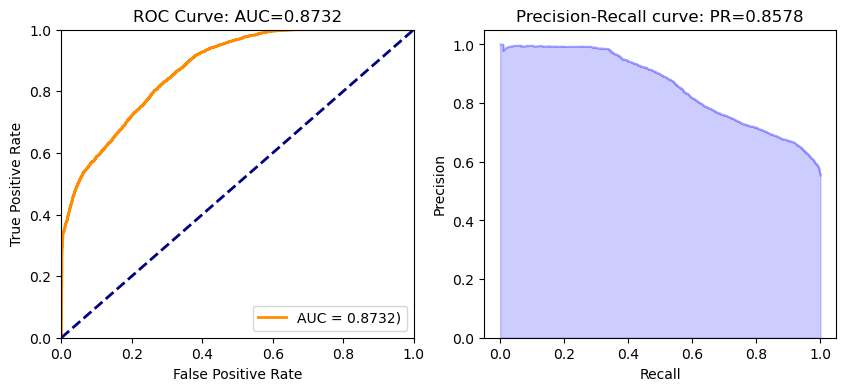

In [431]:
ROC_PR(RF_actual_predict)

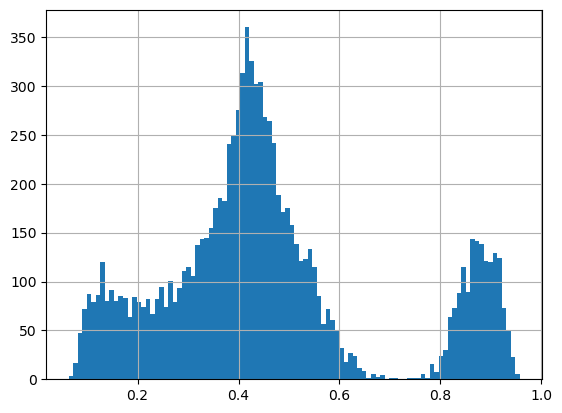

In [432]:
RF_actual_predict['pred'].hist(bins=100)

In [433]:
# 0.8 might be a good threshold
RF_actual_predict['pred_class'] = np.where(RF_actual_predict['pred']>0.4,1,0)

In [434]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(RF_actual_predict['pred_class'],RF_actual_predict['actual']))
print(classification_report(RF_actual_predict['pred_class'],RF_actual_predict['actual']))

[[3504  517]
 [1890 3953]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74      4021
           1       0.88      0.68      0.77      5843

    accuracy                           0.76      9864
   macro avg       0.77      0.77      0.76      9864
weighted avg       0.79      0.76      0.76      9864



## Conclusion

There're several factors that I think might be helpful to have a better prediction on the employee retention:

1. Work-Life-Balance
2. Work schedule flexibility
3. Teammate ralationship/group work satisfaction: how happy is the employee with the team
4. Health/wellness benefits
5. Tail-Performer layoff
6. Top performer recognition and rewards
7. Personal Development
8. Compensation
9. Management & Leadership Team
10. Onboarding & Training

This information might be able to help us have a better understanding of the retention rate / churn rate of the employees in the company.